# Question:

How has COVID-19 impacted unemployment in Canada? In which provinces is unemployment most impacted by COVID-19?

In [1]:
#Import dependancies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from scipy import stats

In [9]:
#Stats Canada data files only show 2 months of unemplyment data. The csv data files are cleaned for the specific columns 
# containing monthly unemployment rates by geography (Canada and provinces). 

oct_nov_19_filepath = os.path.join("Resources","Oct 19 Nov 19 StatsCan Unemployment.csv")
oct_nov_19 = pd.read_csv(oct_nov_19_filepath)
oct_nov_19 = oct_nov_19[["Geography 4", "Oct-19", "Nov-19"]]
oct_nov_19 = oct_nov_19.dropna()

dec_jan_20_filepath = os.path.join("Resources","Dec 19 Jan 20 StatsCan Unemployment.csv")
dec_jan_20 = pd.read_csv(dec_jan_20_filepath)
dec_jan_20 = dec_jan_20[["Geography 4", "Dec-19", "Jan-20"]]
dec_jan_20 = dec_jan_20.dropna()

feb_mar_20_filepath = os.path.join("Resources", "Feb 20 Mar 20 StatsCan Unemployment.csv")
feb_mar_20 = pd.read_csv(feb_mar_20_filepath)
feb_mar_20 = feb_mar_20[["Geography 4", "Feb-20", "Mar-20"]]
feb_mar_20 = feb_mar_20.dropna()

apr_may_20_filepath = os.path.join("Resources","Apr 20 May 20 StatsCan Unemployment.csv")
apr_may_20 = pd.read_csv(apr_may_20_filepath)
apr_may_20 = apr_may_20[["Geography 4", "Apr-20", "May-20"]]
apr_may_20 = apr_may_20.dropna()

jun_jul_20_filepath = os.path.join("Resources","Jun 20 Jul 20 StatsCan Unemployment.csv")
jun_jul_20 = pd.read_csv(jun_jul_20_filepath)
jun_jul_20 = jun_jul_20[["Geography 4", "Jun-20", "Jul-20"]]
jun_jul_20 = jun_jul_20.dropna()

aug_sep_20_filepath = os.path.join("Resources","Aug 20 Sep 20 StatsCan Unemployment.csv")
aug_sep_20 = pd.read_csv(aug_sep_20_filepath)
aug_sep_20 = aug_sep_20[["Geography 4", "Aug-20", "Sep-20"]]
aug_sep_20 = aug_sep_20.dropna()

oct_nov_20_filepath = os.path.join("Resources","Oct 20 Nov 20 StatsCan Unemployment.csv")
oct_nov_20 = pd.read_csv(oct_nov_20_filepath, error_bad_lines = False)
oct_nov_20 = oct_nov_20[["Geography 4", "Oct-20", "Nov-20"]]
oct_nov_20 = oct_nov_20.dropna()

In [10]:
#Stats Canada data files are merged into one dataframe to show 12 months of unemployment data together by province. 

merged_can_unemp = pd.merge(oct_nov_19, dec_jan_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, feb_mar_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, apr_may_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, jun_jul_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, aug_sep_20, on ="Geography 4")
merged_can_unemp = pd.merge(merged_can_unemp, oct_nov_20, on ="Geography 4")


prov_can_unemp = merged_can_unemp.drop([0])
prov_can_unemp = prov_can_unemp.rename(columns={"Geography 4": "Province"})
prov_can_unemp

,Province,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
1,Newfoundland and Labrador,11.1,11.3,11.8,11.9,12.0,11.7,16.0,16.3,16.5,15.6,13.1,14.8,12.8,11.3
2,Prince Edward Island,8.2,8.0,7.9,7.5,8.0,8.6,10.8,13.9,15.2,11.7,10.7,10.1,10.0,8.0
3,Nova Scotia,8.1,7.9,7.9,7.4,7.8,9.0,12.0,13.6,13.0,10.8,10.3,7.9,8.7,7.9
4,New Brunswick,8.1,7.9,7.5,7.5,6.9,8.8,13.2,12.8,9.9,9.8,9.4,10.4,10.1,7.9
5,Quebec,5.0,5.6,5.3,5.1,4.5,8.1,17.0,13.7,10.7,9.5,8.7,7.4,7.7,5.6
6,Ontario,5.3,5.5,5.3,5.2,5.5,7.6,11.3,13.6,12.2,11.3,10.6,9.5,9.6,5.5
7,Manitoba,5.3,5.6,5.0,5.1,5.0,6.4,11.4,11.2,10.1,8.2,8.1,7.0,7.1,5.6
8,Saskatchewan,5.2,5.8,5.7,6.0,6.2,7.3,11.3,12.5,11.6,8.8,7.9,6.8,6.4,5.8
9,Alberta,6.8,7.2,7.0,7.3,7.2,8.7,13.4,15.5,15.5,12.8,11.8,11.7,10.7,7.2
10,British Columbia,4.8,5.0,4.8,4.5,5.0,7.2,11.5,13.4,13.0,11.1,10.7,8.4,8.0,5.0


In [11]:
#Transpose data to have Provinces in columns and groupby Month

prov_can_unemp = prov_can_unemp.transpose()


columns= prov_can_unemp.iloc[0].values
prov_can_unemp.columns=columns
prov_can_unemp.drop('Province', axis =0, inplace=True)
prov_can_unemp.reset_index(inplace =True)
prov_can_unemp.rename(columns = {"index":"Month"}, inplace=True)
prov_can_unemp


,Month,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia
0,Oct-19,11.1,8.2,8.1,8.1,5,5.3,5.3,5.2,6.8,4.8
1,Nov-19,11.3,8,7.9,7.9,5.6,5.5,5.6,5.8,7.2,5
2,Dec-19,11.8,7.9,7.9,7.5,5.3,5.3,5,5.7,7,4.8
3,Jan-20,11.9,7.5,7.4,7.5,5.1,5.2,5.1,6,7.3,4.5
4,Feb-20,12,8,7.8,6.9,4.5,5.5,5,6.2,7.2,5
5,Mar-20,11.7,8.6,9,8.8,8.1,7.6,6.4,7.3,8.7,7.2
6,Apr-20,16,10.8,12,13.2,17,11.3,11.4,11.3,13.4,11.5
7,May-20,16.3,13.9,13.6,12.8,13.7,13.6,11.2,12.5,15.5,13.4
8,Jun-20,16.5,15.2,13,9.9,10.7,12.2,10.1,11.6,15.5,13
9,Jul-20,15.6,11.7,10.8,9.8,9.5,11.3,8.2,8.8,12.8,11.1


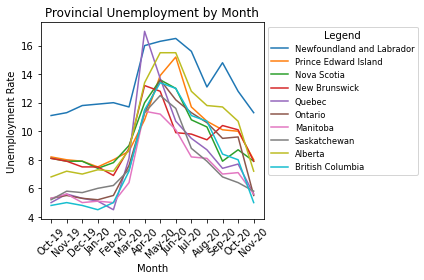

In [13]:
#Plot the provincial unemployment data (Oct-19 to Sept-20)
prov_can_unemp.plot()
plt.title("Provincial Unemployment by Month")
x_ticks=np.arange(len(prov_can_unemp["Month"]))
plt.xticks(x_ticks, ["Oct-19", "Nov-19", "Dec-19", "Jan-20", "Feb-20", 
                    "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20", "Oct-20", "Nov-20"], rotation=45)
plt.ylabel("Unemployment Rate")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()

In [14]:
#October, November, and December unemployment values are dropped to isolate to the COVID-19 impacts. 
prov_can_unemp = prov_can_unemp.drop([0,1,2])
prov_can_unemp = prov_can_unemp.reset_index()
prov_can_unemp = prov_can_unemp.drop(columns= "index")
prov_can_unemp

,Month,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia
0,Jan-20,11.9,7.5,7.4,7.5,5.1,5.2,5.1,6,7.3,4.5
1,Feb-20,12,8,7.8,6.9,4.5,5.5,5,6.2,7.2,5
2,Mar-20,11.7,8.6,9,8.8,8.1,7.6,6.4,7.3,8.7,7.2
3,Apr-20,16,10.8,12,13.2,17,11.3,11.4,11.3,13.4,11.5
4,May-20,16.3,13.9,13.6,12.8,13.7,13.6,11.2,12.5,15.5,13.4
5,Jun-20,16.5,15.2,13,9.9,10.7,12.2,10.1,11.6,15.5,13
6,Jul-20,15.6,11.7,10.8,9.8,9.5,11.3,8.2,8.8,12.8,11.1
7,Aug-20,13.1,10.7,10.3,9.4,8.7,10.6,8.1,7.9,11.8,10.7
8,Sep-20,14.8,10.1,7.9,10.4,7.4,9.5,7,6.8,11.7,8.4
9,Oct-20,12.8,10,8.7,10.1,7.7,9.6,7.1,6.4,10.7,8


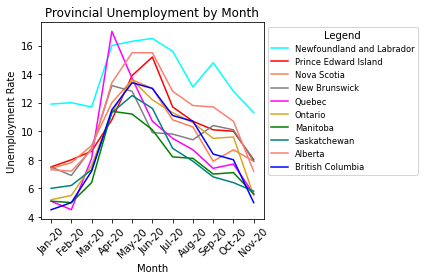

In [16]:
#Plot the revised provincial unemployment data (Jan-20 to Sept-20)

prov_can_unemp.plot('Month',['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 
                             'Quebec','Ontario', 
                            'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia'],
                    color =['aqua', 'r', 'coral', 'grey', 'fuchsia', 'goldenrod', 'green', 'teal', 'salmon',
                            'b', 'orange'])
plt.title("Provincial Unemployment by Month")
x_ticks=np.arange(len(prov_can_unemp["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20", "Oct-20", "Nov-20"], rotation=45)
plt.ylabel("Unemployment Rate")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()


# Observations:

* Overall, all provinces experienced a spike in unemployment starting in March (impacts of COVID). 
* For the most part, provinces have been able to bring unemployment down from the levels seen in the March to May timeframe. 
* Newfoundland and Labrador experienced the highest unemployment of provinces in Canada during this time frame.
* Although it is important to note that N&L had the highest unemployment rate before COVID-19 impacts would have taken affect. 
* Quebec experienced the highest spike in unemployment around March and April but this has been dramatically reduced. 
* Quebec unemployment as of September is among the lowest in Canada. 

In [ ]:
#Pull Johns Hopkins Data on cumulative COVID-19 confirmed case counts. Isolate for Canada only and exclude cruise ship 
# (Diamond Princess) cases. Only include case counts on last day of the month to capture the monthly total. 

can_cases_filepath = os.path.join("Resources", "confirmed_global.csv")
can_cases = pd.read_csv(can_cases_filepath)
can_cases = can_cases.loc[can_cases["Country/Region"]=="Canada"]
can_cases = can_cases.drop([41,42])
can_cases = can_cases[["Province/State", "1/31/20", "2/29/20", "3/31/20","4/30/20", "5/31/20", 
                       "6/30/20", "7/31/20", "8/31/20", "9/30/20"]]

can_cases = can_cases.rename(columns = {"Province/State":"Province"})
can_cases

In [ ]:
#Transpose data to have Provinces in columns and groupby Month
can_cases = can_cases.transpose()


columns= can_cases.iloc[0].values
can_cases.columns=columns
can_cases.drop('Province', axis =0, inplace=True)
can_cases.reset_index(inplace =True)
can_cases.rename(columns = {"index":"Month"}, inplace=True)
can_cases

In [ ]:
#Plot the provincial COVID-19 case data (Jan-20 to Sept-20)
can_cases.plot('Month',['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec','Ontario', 
                            'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia'],
                    color =['aqua', 'r', 'coral', 'grey', 'fuchsia', 'goldenrod', 'green', 'teal', 'salmon',
                            'b', 'orange'])
plt.title("Provincial COVID-19 Cases by Month")
x_ticks=np.arange(len(can_cases["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", 
                    "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20"], rotation=45)
plt.ylabel("Confirmed COVID-19 Cases")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()

# Observations:

* Quebec, Ontario, Alberta, and British Columbia have the highest number of COVID-19 confirmed cases (in order of volume). 
* Quebec and Ontario experienced a sharp spike in cases in the March to May timeframe, which slightly leveled off until August. 
* Quebec and Ontario experienced a second sharp spike in cases between August and September. 

In [ ]:
#Plot unemployment data and case data together. 

can_cases.plot('Month',['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec','Ontario', 
                            'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia'],
                    color =['aqua', 'r', 'coral', 'grey', 'fuchsia', 'goldenrod', 'green', 'teal', 'salmon',
                            'b', 'orange'])
plt.title("Provincial COVID-19 Cases by Month")
x_ticks=np.arange(len(can_cases["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", 
                    "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20"], rotation=45)
plt.ylabel("Confirmed COVID-19 Cases")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()
plt.savefig('Output/Provincial_COVID_Cases.png')



prov_can_unemp.plot('Month',['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 
                             'Quebec','Ontario', 
                            'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia'],
                    color =['aqua', 'r', 'coral', 'grey', 'fuchsia', 'goldenrod', 'green', 'teal', 'salmon',
                            'b', 'orange'])
plt.title("Provincial Unemployment by Month")
x_ticks=np.arange(len(prov_can_unemp["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20"], rotation=45)
plt.ylabel("Unemployment Rate")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()
plt.savefig('Output/Provincial_Unemployment.png')


# COVID-19 Cases Observations:

* Quebec, Ontario, Alberta, and British Columbia have the highest number of COVID-19 confirmed cases (in order of volume).
* Quebec and Ontario experienced a sharp spike in cases in the March to May timeframe, which slightly leveled off until August.
* Quebec and Ontario experienced a second sharp spike in cases between August and September.

# Unemployment Observations:

* Overall, all provinces experienced a spike in unemployment starting in March (impacts of COVID).
* For the most part, provinces have been able to bring unemployment down from the levels seen in the March to May timeframe.
* Newfoundland and Labrador experienced the highest unemployment of provinces in Canada during this time frame.
* Although it is important to note that N&L had the highest unemployment rate before COVID-19 impacts would have taken affect.
* Quebec experienced the highest spike in unemployment around March and April but this has been dramatically reduced.
* Quebec unemployment as of September is among the lowest in Canada.


In [ ]:
#Isolating Ontario and Quebec in the plots. 

can_cases.plot('Month',[ 'Quebec','Ontario'],
                    color =[ 'fuchsia', 'goldenrod'])
plt.title("COVID-19 Cases by Month - Quebec and Ontario")
x_ticks=np.arange(len(can_cases["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", 
                    "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20"], rotation=45)
plt.ylabel("Confirmed COVID-19 Cases")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()
plt.savefig('Output/Quebec_Ontario_COVID_Cases.png')

prov_can_unemp.plot('Month',['Quebec','Ontario'],color =['fuchsia', 'goldenrod'])
plt.title("Unemployment by Month - Quebec and Ontario")
x_ticks=np.arange(len(prov_can_unemp["Month"]))
plt.xticks(x_ticks, ["Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20"], rotation=45)
plt.ylabel("Unemployment Rate")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left', prop=fontP)
plt.tight_layout()
plt.savefig('Output/Quebec_Ontario_Unemployment.png')

# Observations:

* Quebec's unemployment rate was at its peak in April when COVID-19 cases were sharply increasing. 
* Ontario's rate of COVID-19 cases was lower than Quebec and the province's peak unemployment rate came later than Quebec at May. 
* Quebec and Ontario were able to flatten their curves between May and August and unemployment rates declined during this time as well. 